In [45]:


import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import random

#Makes plots interactive
#%matplotlib notebook




In [46]:
class vector(object):
    #Requires matplotlib
    def __init__(self,list):
        self.vector = np.array(list)
        self.origin = np.zeros(len(list))

    def __str__(self):
        return str(self.vector)
        
    def vplot(self):
        #2D cartesian return
        if len(self.vector) == 2:
            return ([self.origin[0],self.vector[0]],
                    [self.origin[1],self.vector[1]])
        elif len(self.vector) == 3:
            return ([self.origin[0],self.vector[0]],
                    [self.origin[1],self.vector[1]],
                    [self.origin[2],self.vector[2]])
    
    def dot(self,otherv):
        d = 0
        for i,j in zip(self.vector,otherv.vector):
            d += i*j
        
        return d
    
    def cross(self,otherv):
        #You could implement a nice recursive definition of the 
        #determinant of higher dimensional matrixes base case = a 2X2 matrix


        m = np.array([self.vector,otherv.vector])
        return np.linalg.det(m)
        
    def length(self):
        length = 0
        for i in self.vector:
            length += i**2
        return(np.sqrt(length))
    
    def norm(self):
        #cartesian norm - identical to length
        norm = 0
        for i in self.vector:
            norm += i**2
        return(np.sqrt(norm))
    
    

class square(object):
    def __init__(self,i,j):
        self.i = np.array(i)
        self.j = np.array(j)
        
    def transform(self,T):    
        #T is a np matrix
        i = T @ self.i
        j = T @ self.j
        
        return square(i,j)
        
    def array(self):
        return ([0,self.i[0],self.i[0]+self.j[0],self.j[0],0], 
    [0,self.i[1],self.i[1]+self.j[1],self.j[1],0])
    
    
def det(matrix):
    #Recursive determinant proof
    #|At| = |A|.
    #so doesnt matter if you choose rows of columns
    #input = square numpy array
    #OUtput = determinant
    
    if matrix.shape == (1,1):
        print("BASE CASE:", matrix[0])
        return matrix[0]
    
    else:
        determinant = 0
        for i in range(matrix.shape[0]):
            
            rows = [r for r in range(matrix.shape[0]) if r != i]
            columns = [*range(1,matrix.shape[0])]
            
            
            
            #Use my function to create a grid of rows and columns
            index = mesh_index(rows,columns)
            
            print("rows:",rows)
            print("col:",columns)
            print("value",matrix[i,0])
            print("submatrix",matrix[rows,columns])
            print(index[0])
            
            determinant += (-1)**(i+1) * matrix[i,0] * det(matrix[index[0],index[1]] ) 
            
            #use np.ix_ instead ##############TRY FIGURE OUT WHY THIS FUNCTION WORKS BUT THE STAR OEPRATOR DOESNT
            
            # BOOLEAN MASK METHOD DOESNT REALLY WORK, WILL DO SOMEHTING SIMPLER INSTED
            #print(matrix)
            #mask = np.ones(matrix.shape, dtype = bool)
            #mask[:,0]=False
            #mask[i,:]=False
            #print(matrix)
            #print(mask)
            #print(matrix[mask])
            #determinant += matrix[0,0]*det(matrix[mask])
            
        return determinant
    
    
def mesh_index(rows,cols):
    #Bsaic meshgrid to assist with indexing
    #Row and column need to be the same size
    
    size = len(rows)
    r = np.zeros([size,size] , dtype = np.intp)
    c = np.zeros([size,size] , dtype = np.intp)
    
    
    for ind,v in enumerate(zip(rows,cols)):
        r[ind,:] = v[0]
        c[:,ind] = v[1]
        
    return (r,c)


In [47]:
#Nmpy matrix testing

#A = np.array([[2,5,3],[4,0,8],[1,3,0]])



#Trial matrix transformation
A = np.array([[2,2],[1,3]])
Ainv = np.linalg.inv(A)
print(A)
print(Ainv)
#The determinant
# ad - bc
# 2 * 3 - 2 * 1 = 4
print(np.linalg.det(A))

#v = np.array([-3,0,2])
v = [-4,1]


[[2 2]
 [1 3]]
[[ 0.75 -0.5 ]
 [-0.25  0.5 ]]
4.0


In [48]:
#unit square and transformation
u1 = square([1,0],[0,1])
u2 = u1.transform(A)
u3 = u2.transform(Ainv)

In [49]:
#Dot product
a = vector([1,2,3])
b = vector([2,4,5])

print(a.dot(b))

basevector = vector([1,3])
print(basevector.length())
unitvector = vector(basevector.vector / (basevector.length()))
print(unitvector.length())

random.seed(1)

#projection onto a vector
#Create a scatter of random points
data = np.array([[random.uniform(-4,4) for i in range(10)],
                  [random.uniform(-4,4) for i in range(10)]])
dots = []
for i in range(10):
    dots.append(unitvector.dot(vector(data[:,i])))

newdata = np.zeros((2,10))
for i in range(10):
    newdata[:,i] = unitvector.vector * dots[i]
print(newdata)

25
3.1622776601683795
0.9999999999999999
[[ 0.51332764  0.11658795  0.84049189 -1.39089025 -0.13472266  0.49128893
  -0.52969629  1.29962835  0.63851357 -1.50390606]
 [ 1.53998293  0.34976386  2.52147568 -4.17267075 -0.40416799  1.47386679
  -1.58908887  3.89888505  1.9155407  -4.51171818]]


In [50]:
#Cross product
v = vector([-3,1])
w = vector([2,1])
v.cross(w)

#Be careful of rows and columns
m = np.array([v.vector,w.vector]).T
print(m)
print(det(m))

#m = np.array([[3,2,1],[5,6,7],[8,1,4]])
m = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(m)
print(det(m))


[[-3  2]
 [ 1  1]]
rows: [1]
col: [1]
value -3
submatrix [1]
[[1]]
BASE CASE: [1]
rows: [0]
col: [1]
value 1
submatrix [2]
[[0]]
BASE CASE: [2]
[5]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
rows: [1, 2]
col: [1, 2]
value 1
submatrix [5 9]
[[1 1]
 [2 2]]
rows: [1]
col: [1]
value 5
submatrix [9]
[[1]]
BASE CASE: [9]
rows: [0]
col: [1]
value 8
submatrix [6]
[[0]]
BASE CASE: [6]
rows: [0, 2]
col: [1, 2]
value 4
submatrix [2 9]
[[0 0]
 [2 2]]
rows: [1]
col: [1]
value 2
submatrix [9]
[[1]]
BASE CASE: [9]
rows: [0]
col: [1]
value 8
submatrix [3]
[[0]]
BASE CASE: [3]
rows: [0, 1]
col: [1, 2]
value 7
submatrix [2 6]
[[0 0]
 [1 1]]
rows: [1]
col: [1]
value 2
submatrix [6]
[[1]]
BASE CASE: [6]
rows: [0]
col: [1]
value 5
submatrix [3]
[[0]]
BASE CASE: [3]
[0]


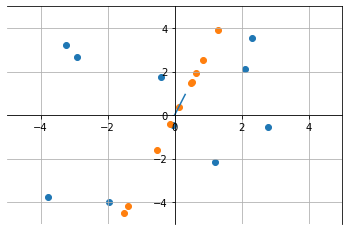

In [51]:
fig = plt.figure()
ax = plt.axes()
#ax = plt.axes(projection = "3d")

#######################################
#puts grid on the plot
ax.grid()
#sets axes (default on)
ax.set_axis_on()
#set specific axis limits
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
#moving axis to middle of plot (using spines)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
########################################

##### Squares
#Plot unit square
#ax.plot(*u1.array())

#Plot transformed square
#ax.plot(*u2.array())

#Plot retransformed
#ax.plot(*u3.array())

ax.plot(*unitvector.vplot())

ax.scatter(*data)
ax.scatter(*newdata)


plt.show()

([0.0, 1], [0.0, 2], [0.0, 3])


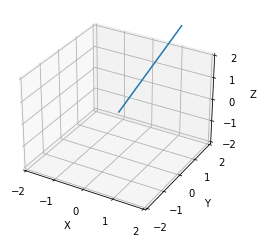

In [52]:
#3D vector plots

fig = plt.figure()
ax = plt.axes(projection='3d')

################Axes
ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-2.0, 2.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-2, 2])
ax.set_zlabel('Z')
########################

print(a.vplot())
#Vectors
ax.plot(*a.vplot())
#ax.plot(*vector(b).vplot())
#ax.plot(*vector(v).vplot())

vector: 
 [[1 2]
 [2 4]
 [3 6]
 [4 8]] 
 Var: 4.6875


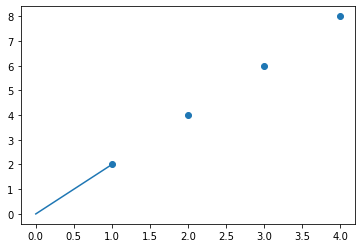

In [66]:
# %%
#Variance test

X = np.array([[1,2,3,4]])
A = np.array([[1,2]])

test = X.T@A

print(
    "vector: \n", test, "\n",
    "Var:", np.var(test)
)


ax1 = plt.subplot()
ax1.plot([0,A[0,0]],[0,A[0,1]])
if test.shape[1] == 1:
    ax1.scatter(test,np.zeros(test.shape))
elif test.shape[1] == 2:
    ax1.scatter(test[:,0],test[:,1])
# %%
